# Inicijalizacija

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv('/content/drive/MyDrive/Master 23 24/Uvod u ML/smoking_driking_dataset.csv')

In [49]:
df.shape

(991346, 24)

In [50]:
df.sample(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
275166,Male,40,170,75,82.0,0.8,0.6,1.0,1.0,126.0,...,130.0,175.0,15.7,1.0,0.8,17.0,23.0,29.0,3.0,Y
318782,Female,70,155,55,82.0,0.8,0.5,1.0,2.0,158.0,...,39.0,79.0,13.0,1.0,0.7,39.0,23.0,21.0,1.0,N
386907,Male,40,170,85,86.0,0.7,0.6,1.0,1.0,124.0,...,55.0,275.0,15.0,4.0,0.9,40.0,41.0,65.0,2.0,Y
479890,Female,40,160,55,71.0,0.9,1.2,1.0,1.0,102.0,...,66.0,116.0,11.3,1.0,0.7,15.0,12.0,11.0,1.0,N
606961,Female,45,155,50,71.0,1.0,1.0,1.0,1.0,122.0,...,118.0,71.0,13.4,1.0,0.9,30.0,27.0,13.0,1.0,N


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


# Analiza i obrada podataka

In [52]:
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [53]:
print(df.duplicated().sum())

26


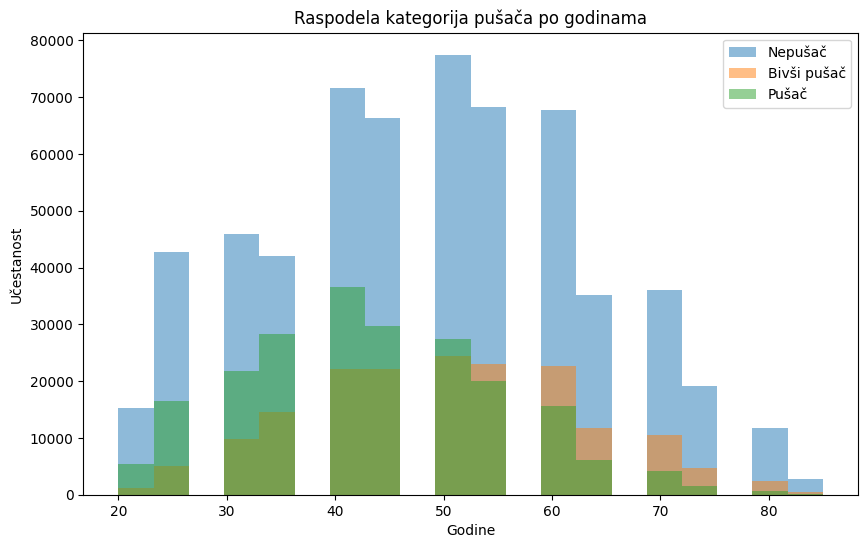

In [54]:
#Kategorije pusaca po godinama
smk_1 = df[df['SMK_stat_type_cd'] == 1]
smk_2 = df[df['SMK_stat_type_cd'] == 2]
smk_3 = df[df['SMK_stat_type_cd'] == 3]

plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'], bins=20, alpha=0.5, label='Nepušač')
plt.hist(smk_2['age'], bins=20, alpha=0.5, label='Bivši pušač')
plt.hist(smk_3['age'], bins=20, alpha=0.5, label='Pušač')
plt.xlabel('Godine')
plt.ylabel('Učestanost')
plt.title('Raspodela kategorija pušača po godinama')
plt.legend()
plt.show()

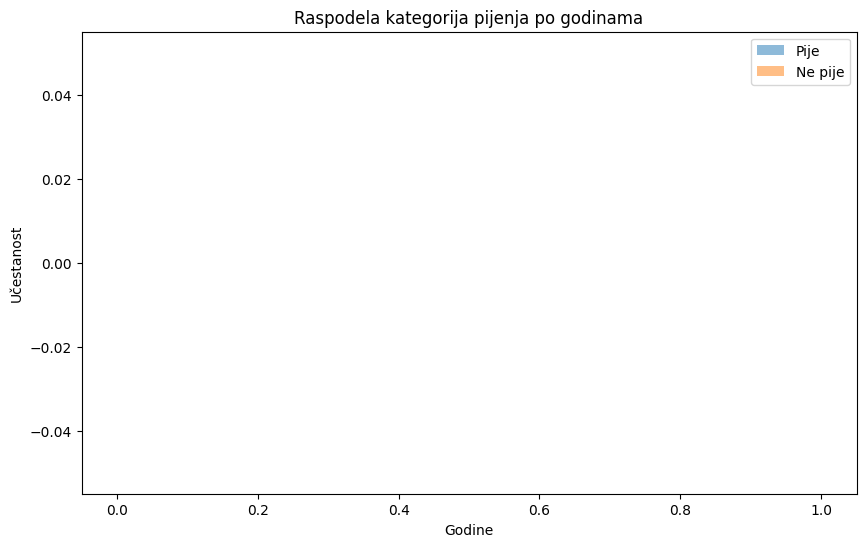

In [55]:
# Filter data based on DRK_YN values
drk_1 = df[df['DRK_YN'] == 1]
drk_2 = df[df['DRK_YN'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Pije')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Ne pije")

plt.xlabel('Godine')
plt.ylabel('Učestanost')
plt.title('Raspodela kategorija pijenja po godinama')
plt.legend()
plt.show()

In [56]:
def plot_boxplots(df):
    num_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(f"{column} boxplot")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

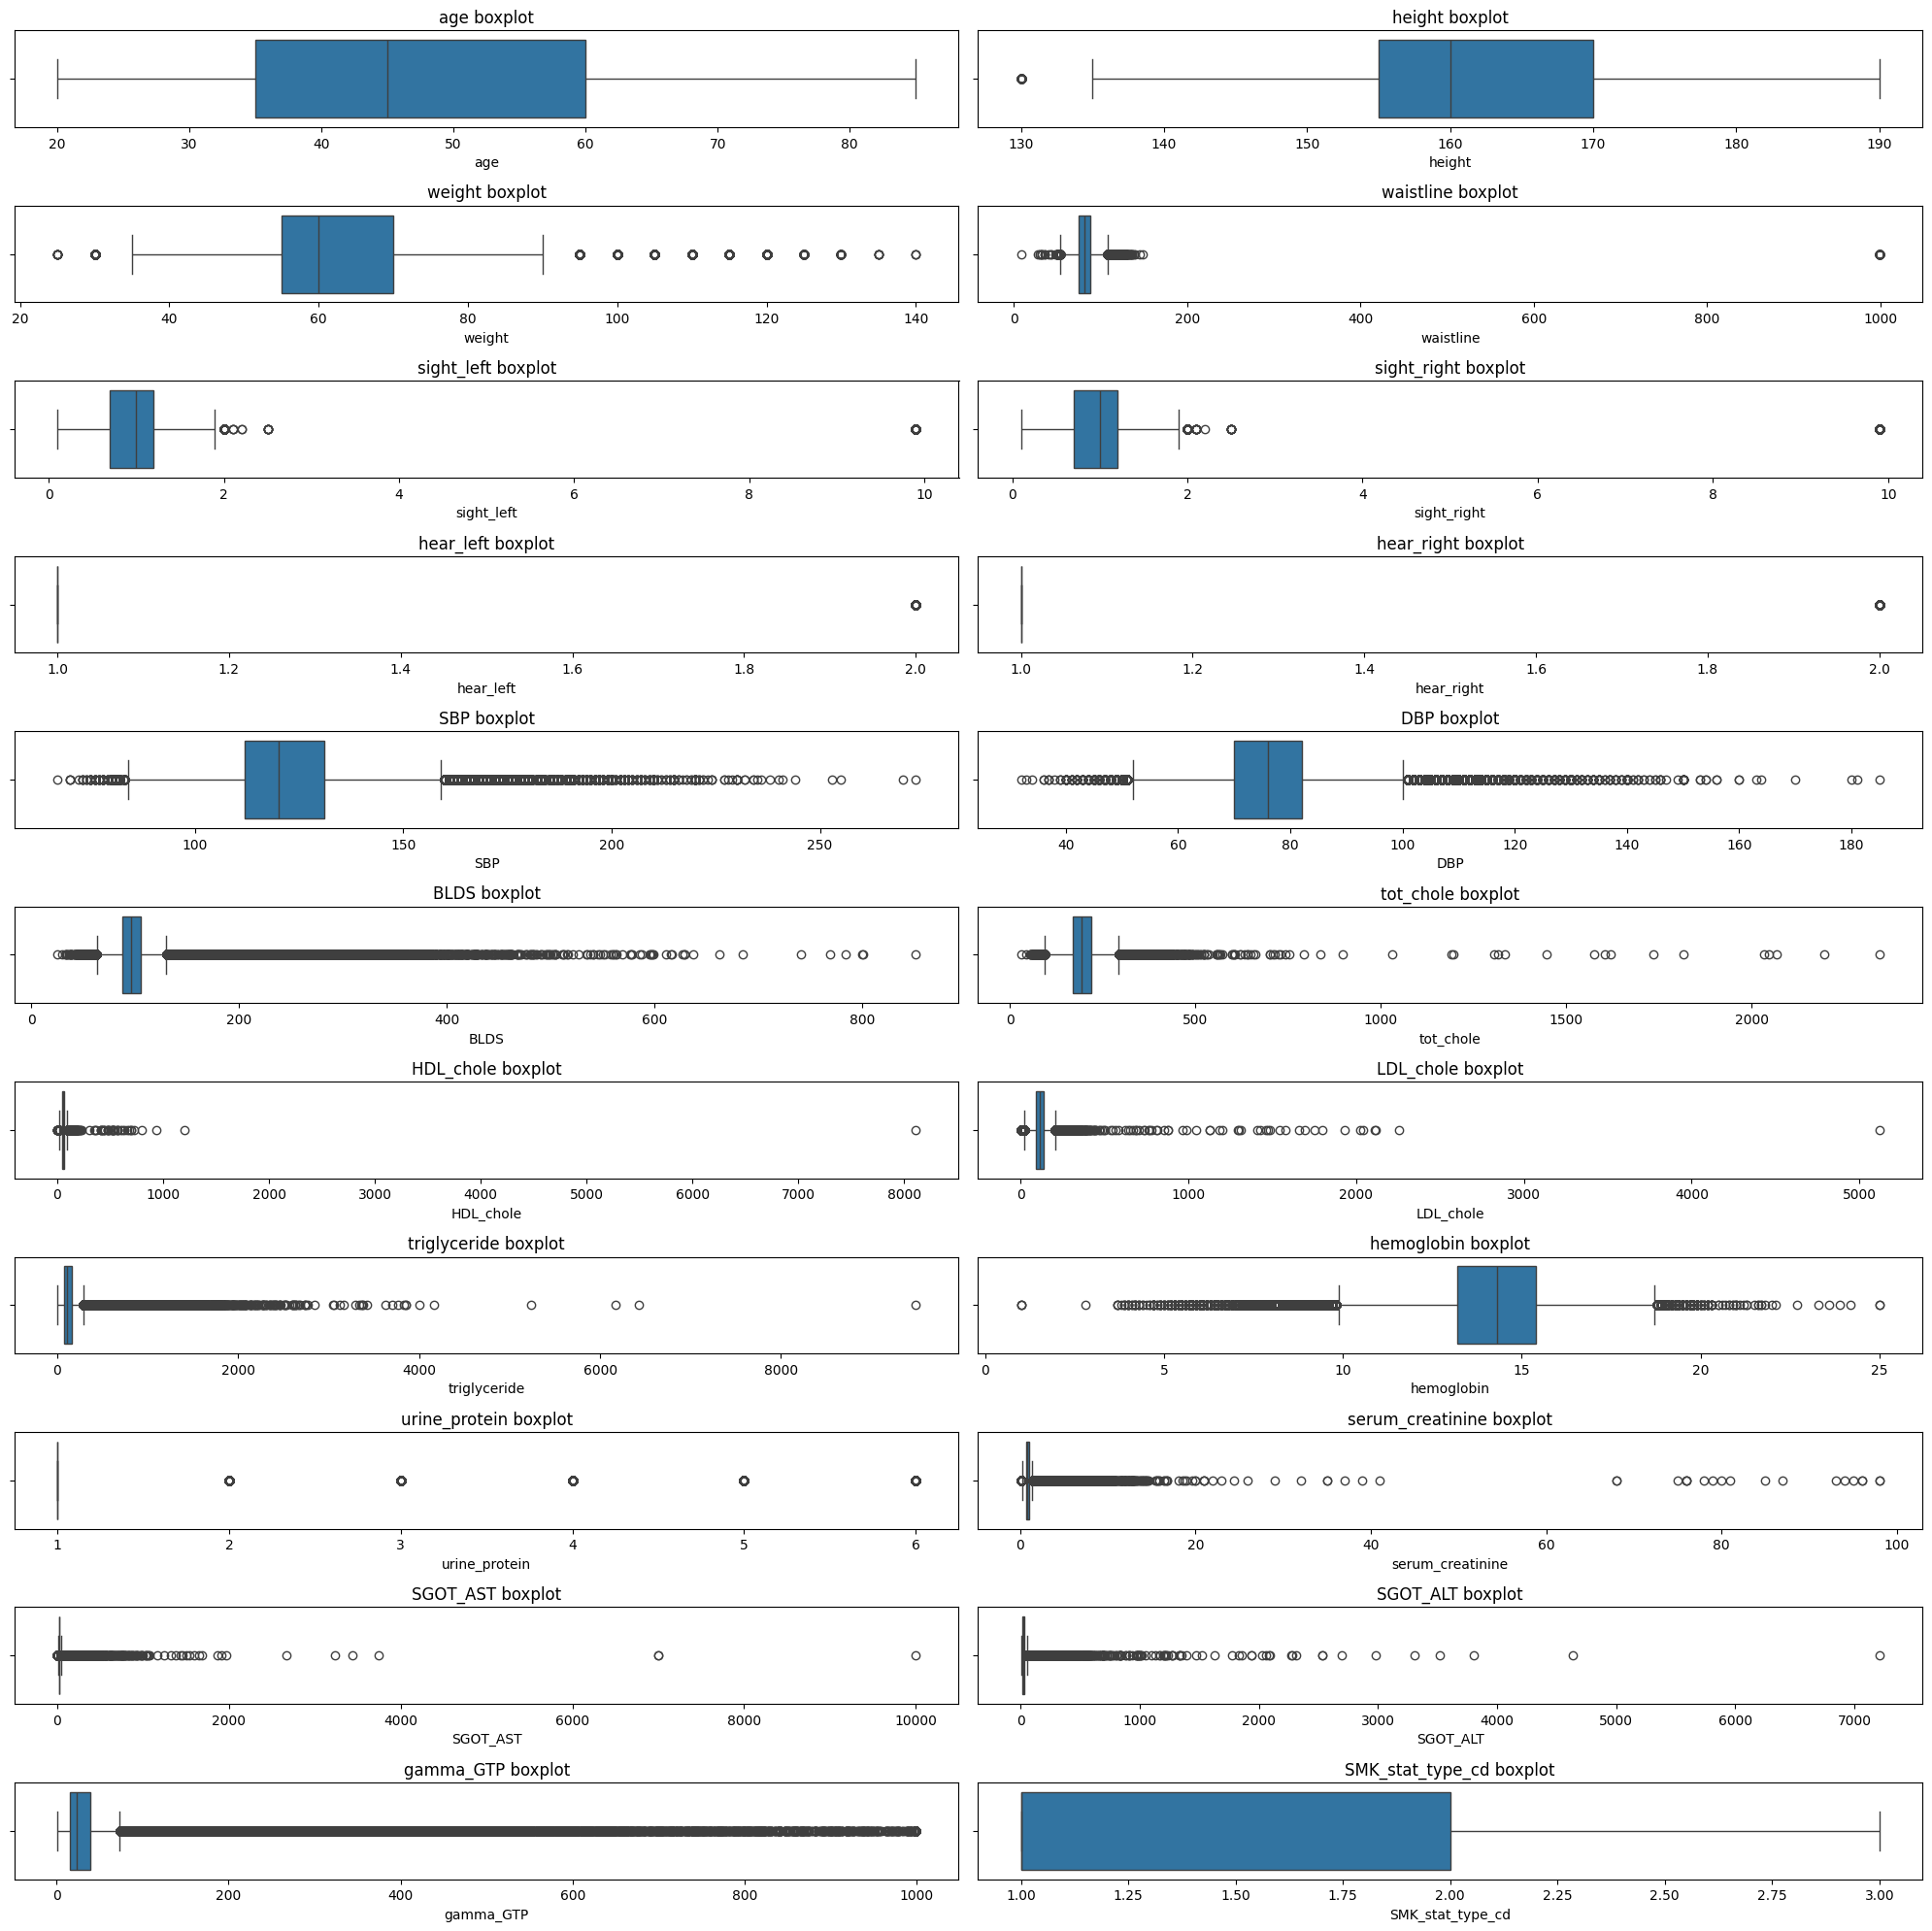

In [57]:
plot_boxplots(df)

<ipython-input-58-3ad950ef19b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(method='pearson'), annot=True)


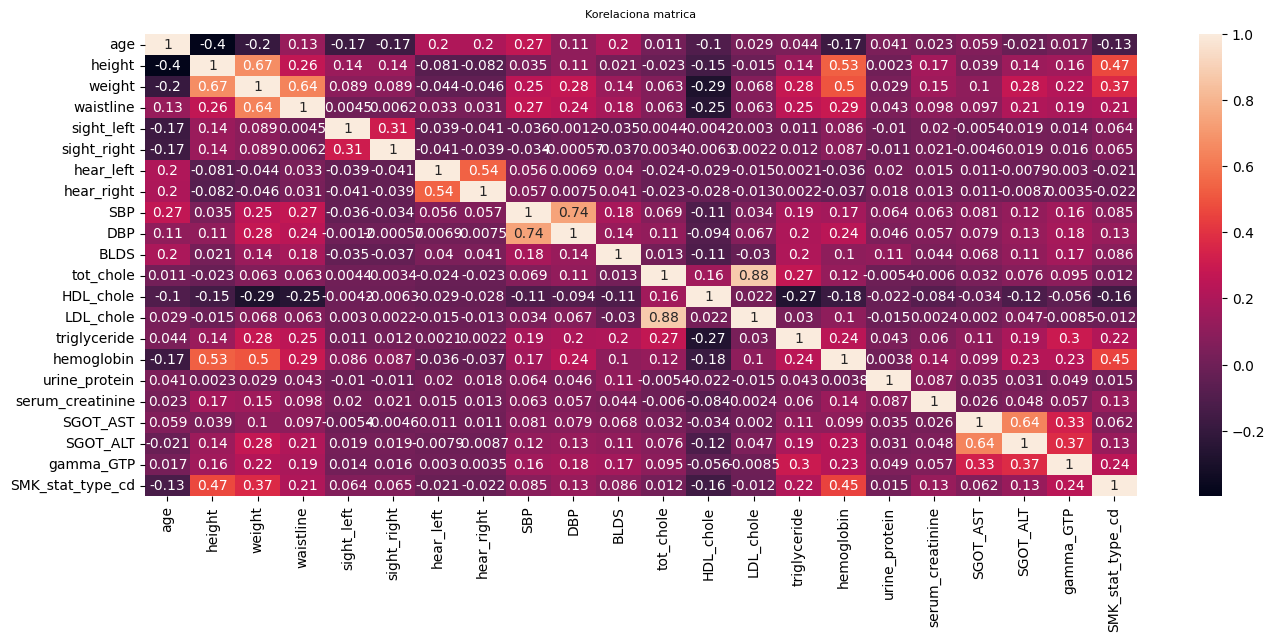

In [58]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method='pearson'), annot=True)
heatmap.set_title('Korelaciona matrica', fontdict={'fontsize': 8}, pad=12);

In [59]:
#Brisanje duplikata
df = df.drop_duplicates(keep='first')

In [60]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_out

In [61]:
colums_with_outliers = ['waistline', 'HDL_chole', 'LDL_chole', 'triglyceride', 'SBP', 'DBP', 'serum_creatinine', 'BLDS', 'SGOT_AST', 'SGOT_ALT', 'tot_chole']

for column in df.columns:
    if column in colums_with_outliers:
        df = remove_outliers(df, column)

df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [62]:
#Transformacija obelezja
df['DRK_YN'] = [1 if i == "Y" else 0 for i in df['DRK_YN']]
df['sex'] = [1 if i == "Male" else 0 for i in df['sex']]

In [63]:
#Izbacivanje obelezja
df.drop(['hear_left', 'hear_right', 'sight_left', 'sight_right'], axis=1, inplace=True)

df.head();

In [64]:
smk_mapping = {1: 'N', 2: 'EX', 3: 'CURR'}
drk_mapping = {1: 'Y', 0: 'N'}

smk_encoded = pd.get_dummies(df['SMK_stat_type_cd'].map(smk_mapping), prefix='SMK')
drk_encoded = pd.get_dummies(df['DRK_YN'].map(drk_mapping), prefix='DRK')

#Definisanje klasa
y_transformed = pd.DataFrame()

for smk_col in smk_encoded.columns:
    for drk_col in drk_encoded.columns:
        y_transformed[f"{smk_col}_{drk_col}"] = smk_encoded[smk_col] * drk_encoded[drk_col]

y_transformed.head()

,SMK_CURR_DRK_N,SMK_CURR_DRK_Y,SMK_EX_DRK_N,SMK_EX_DRK_Y,SMK_N_DRK_N,SMK_N_DRK_Y
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


Uzorci po klasama:
SMK_CURR_DRK_N     48588
SMK_CURR_DRK_Y    147785
SMK_EX_DRK_N       50960
SMK_EX_DRK_Y      112360
SMK_N_DRK_N       374949
SMK_N_DRK_Y       205739
dtype: int64


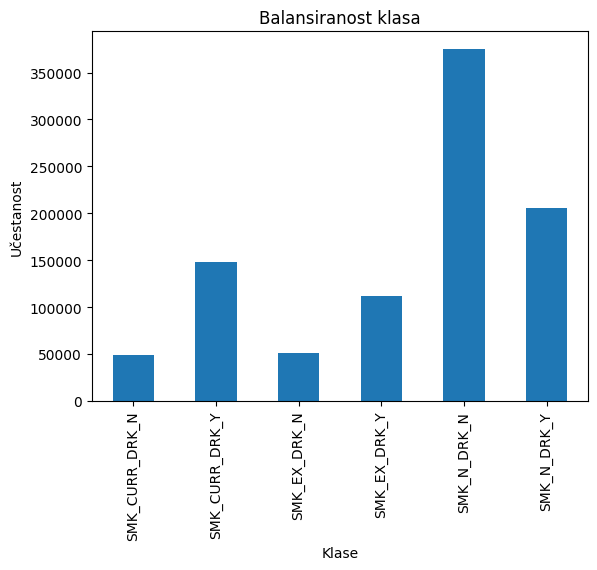

In [65]:
class_counts = y_transformed.sum()

class_counts.plot(kind='bar', xlabel='Klase', ylabel='Učestanost', title='Balansiranost klasa')
print("Uzorci po klasama:")
print(class_counts)

In [66]:
smk_mapping = {1: 'N', 2: 'Y', 3: 'Y'}
drk_mapping = {1: 'Y', 0: 'N'}

smk_encoded = pd.get_dummies(df['SMK_stat_type_cd'].map(smk_mapping), prefix='SMK')
drk_encoded = pd.get_dummies(df['DRK_YN'].map(drk_mapping), prefix='DRK')

#Definisanje klasa
y = pd.DataFrame()

for smk_col in smk_encoded.columns:
    for drk_col in drk_encoded.columns:
        y[f"{smk_col}_{drk_col}"] = smk_encoded[smk_col] * drk_encoded[drk_col]

y.head()

,SMK_N_DRK_N,SMK_N_DRK_Y,SMK_Y_DRK_N,SMK_Y_DRK_Y
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Class Counts:
SMK_N_DRK_N    374949
SMK_N_DRK_Y    205739
SMK_Y_DRK_N     99548
SMK_Y_DRK_Y    260145
dtype: int64


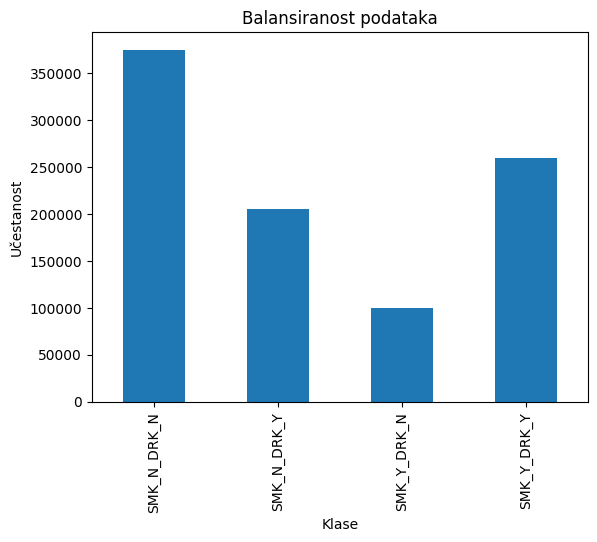

In [67]:
class_counts = y.sum()

class_counts.plot(kind='bar', xlabel='Klase', ylabel='Učestanost', title='Balansiranost podataka')

print("Class Counts:")
print(class_counts)

In [68]:
# BMI = weight(kg) / (height(m)^2)
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

In [69]:
x = df.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)

In [70]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,940381.0,0.519432,0.499623,0.000000,0.000000,1.000000,1.000000,1.000000
age,940381.0,47.559202,14.219439,20.000000,35.000000,45.000000,60.000000,85.000000
height,940381.0,162.104711,9.273556,130.000000,155.000000,160.000000,170.000000,190.000000
weight,940381.0,62.888000,12.274561,25.000000,55.000000,60.000000,70.000000,140.000000
waistline,940381.0,80.843442,9.472698,35.000000,74.000000,81.000000,87.000000,129.000000
SBP,940381.0,122.076269,14.346950,70.000000,111.000000,120.000000,130.000000,194.000000
DBP,940381.0,75.828876,9.760727,33.000000,70.000000,76.000000,81.000000,125.000000
BLDS,940381.0,97.950289,15.751223,25.000000,88.000000,95.000000,104.000000,177.000000
tot_chole,940381.0,194.945760,37.193930,45.000000,169.000000,193.000000,218.000000,386.000000
HDL_chole,940381.0,57.275438,14.714830,1.000000,47.000000,55.000000,66.000000,132.000000


# Treniranje i evaluacija modela

In [71]:
def k_fold(x, y, k):
    folds = KFold(n_splits=k, shuffle=True, random_state=42)
    x_folds = []
    y_folds = []
    for train_index, test_index in folds.split(x):
        x_folds.append((x.iloc[train_index], x.iloc[test_index]))
        y_folds.append((y[train_index], y[test_index]))
    return x_folds, y_folds


def standardize(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

def minmax_standardize(x_train, x_test):
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

def lda(x_train, y_train, x_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(x_train, y_train)
    return lda.transform(x_train), lda.transform(x_test)

def train(x_train, y_train, x_val, y_val, model, hyperparameters):
    model = model(**hyperparameters)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')
    return model, accuracy, f1


In [72]:
def transform_y(y):
    return np.argmax(y.values, axis=1)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

x_train_l, x_test_l, y_train_l, y_test_l = x_train[:10000], x_test[:10000], y_train[:10000], y_test[:10000] #za bržu validaciju

Biranje hiperparametara

In [74]:
models_hyperparameters = {
    KNeighborsClassifier: [
        {'n_neighbors': 5, 'metric': 'euclidean'},
        {'n_neighbors': 9, 'metric': 'euclidean'},
        {'n_neighbors': 17, 'metric': 'euclidean'},
        {'n_neighbors': 25, 'metric': 'euclidean'},
        {'n_neighbors': 49, 'metric': 'euclidean'},
        {'n_neighbors': 101, 'metric': 'euclidean'},
        {'n_neighbors': 5, 'metric': 'chebyshev'},
        {'n_neighbors': 9, 'metric': 'chebyshev'},
        {'n_neighbors': 17, 'metric': 'chebyshev'},
        {'n_neighbors': 25, 'metric': 'chebyshev'},
        {'n_neighbors': 49, 'metric': 'chebyshev'},
        {'n_neighbors': 101, 'metric': 'chebyshev'},
        {'n_neighbors': 5, 'metric': 'manhattan'},
        {'n_neighbors': 9, 'metric': 'manhattan'},
        {'n_neighbors': 17, 'metric': 'manhattan'},
        {'n_neighbors': 25, 'metric': 'manhattan'},
        {'n_neighbors': 49, 'metric': 'manhattan'},
        {'n_neighbors': 101, 'metric': 'manhattan'}
    ],
    LogisticRegression: [
        {'max_iter': 10, 'multi_class': 'ovr'},
        {'max_iter': 100, 'multi_class': 'ovr'},
        {'max_iter': 500, 'multi_class': 'ovr'},
        {'max_iter': 1000, 'multi_class': 'ovr'},
        {'max_iter': 5000, 'multi_class': 'ovr'},
        {'max_iter': 10000, 'multi_class': 'ovr'},
        {'max_iter': 10, 'multi_class': 'multinomial'},
        {'max_iter': 100, 'multi_class': 'multinomial'},
        {'max_iter': 500, 'multi_class': 'multinomial'},
        {'max_iter': 1000, 'multi_class': 'multinomial'},
        {'max_iter': 5000, 'multi_class': 'multinomial'},
        {'max_iter': 10000, 'multi_class': 'multinomial'},
        {'max_iter': 10},
        {'max_iter': 100},
        {'max_iter': 500},
        {'max_iter': 1000},
        {'max_iter': 5000},
        {'max_iter': 10000},
    ],
    RandomForestClassifier: [
        {'n_estimators': 3, 'max_depth': 2},
        {'n_estimators': 3, 'max_depth': 5},
        {'n_estimators': 3, 'max_depth': 15},
        {'n_estimators': 5, 'max_depth': 2},
        {'n_estimators': 3, 'max_depth': 5},
        {'n_estimators': 3, 'max_depth': 15},
        {'n_estimators': 15, 'max_depth': 3},
        {'n_estimators': 30, 'max_depth': 3},
        {'n_estimators': 50, 'max_depth': 3},
        {'n_estimators': 200, 'max_depth': 3},
        {'n_estimators': 500, 'max_depth': 3},
        {'n_estimators': 100, 'max_depth': 5},
        {'max_depth': 3},
        {'max_depth': 5},
        {'max_depth': 7},
        {'max_depth': 10},
        {'max_depth': 20},
    ]
}

In [75]:
models = [KNeighborsClassifier, LogisticRegression, RandomForestClassifier]

Unakrsna validacija i evaluacija modela

In [76]:
y_train_l = transform_y(y_train_l)
y_test_l = transform_y(y_test_l)

k = 5

best_models = {}
best_hyperparameters = {}

x_folds, y_folds = k_fold(x_train_l, y_train_l, k)

for model_type in models:
    best_accuracy = 0
    best_f1_score = 0
    best_hyperparameter = None

    for hyperparameters in models_hyperparameters[model_type]:
        total_accuracy = 0
        total_f1_score = 0

        for i in range(k):
            x_fold_train, x_fold_eval = x_folds[i]
            y_fold_train, y_fold_eval = y_folds[i]

            x_fold_train_std, x_fold_eval_std = minmax_standardize(x_fold_train, x_fold_eval)
            x_fold_train_lda, x_fold_eval_lda = lda(x_fold_train_std, y_fold_train, x_fold_eval_std)

            model, accuracy, f1 = train(x_fold_train_lda, y_fold_train, x_fold_eval_lda, y_fold_eval, model_type, hyperparameters)
            print(f"Fold: {i}\nModel: {model}\nHyperparameters: {hyperparameters}\nAccuracy: {accuracy}\nF1 score: {f1}\n")

            total_accuracy += accuracy
            total_f1_score += f1

        avg_accuracy = total_accuracy / k
        avg_f1_score = total_f1_score / k

        if avg_accuracy > best_accuracy:
            best_accuracy = avg_accuracy
            best_f1_score = avg_f1_score
            best_hyperparameter = hyperparameters

    best_models[model_type] = best_accuracy
    best_hyperparameters[model_type] = best_hyperparameter

    print("***** Best model *****")
    print(f"\nModel: {model_type.__name__}\nBest hyperparameters: {best_hyperparameter}\nBest accuracy: {best_accuracy}\nBest F1-score: {best_f1_score}\n")
    print("**********************")

Fold: 0
Model: KNeighborsClassifier(metric='euclidean')
Hyperparameters: {'n_neighbors': 5, 'metric': 'euclidean'}
Accuracy: 0.536
F1 score: 0.4412196196672692

Fold: 1
Model: KNeighborsClassifier(metric='euclidean')
Hyperparameters: {'n_neighbors': 5, 'metric': 'euclidean'}
Accuracy: 0.539
F1 score: 0.45310026601408393

Fold: 2
Model: KNeighborsClassifier(metric='euclidean')
Hyperparameters: {'n_neighbors': 5, 'metric': 'euclidean'}
Accuracy: 0.546
F1 score: 0.4599556535422712

Fold: 3
Model: KNeighborsClassifier(metric='euclidean')
Hyperparameters: {'n_neighbors': 5, 'metric': 'euclidean'}
Accuracy: 0.5345
F1 score: 0.44742818075782087

Fold: 4
Model: KNeighborsClassifier(metric='euclidean')
Hyperparameters: {'n_neighbors': 5, 'metric': 'euclidean'}
Accuracy: 0.5295
F1 score: 0.440065552301657

Fold: 0
Model: KNeighborsClassifier(metric='euclidean', n_neighbors=9)
Hyperparameters: {'n_neighbors': 9, 'metric': 'euclidean'}
Accuracy: 0.565
F1 score: 0.4616690325700566

Fold: 1
Model: K

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 2
Model: LogisticRegression(max_iter=10, multi_class='ovr')
Hyperparameters: {'max_iter': 10, 'multi_class': 'ovr'}
Accuracy: 0.6045
F1 score: 0.4589320453842677

Fold: 3
Model: LogisticRegression(max_iter=10, multi_class='ovr')
Hyperparameters: {'max_iter': 10, 'multi_class': 'ovr'}
Accuracy: 0.613
F1 score: 0.4660217234161004

Fold: 4
Model: LogisticRegression(max_iter=10, multi_class='ovr')
Hyperparameters: {'max_iter': 10, 'multi_class': 'ovr'}
Accuracy: 0.616
F1 score: 0.46356220616651667



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 0
Model: LogisticRegression(multi_class='ovr')
Hyperparameters: {'max_iter': 100, 'multi_class': 'ovr'}
Accuracy: 0.617
F1 score: 0.46753906571493165

Fold: 1
Model: LogisticRegression(multi_class='ovr')
Hyperparameters: {'max_iter': 100, 'multi_class': 'ovr'}
Accuracy: 0.6075
F1 score: 0.45384747808512826

Fold: 2
Model: LogisticRegression(multi_class='ovr')
Hyperparameters: {'max_iter': 100, 'multi_class': 'ovr'}
Accuracy: 0.6045
F1 score: 0.4589320453842677

Fold: 3
Model: LogisticRegression(multi_class='ovr')
Hyperparameters: {'max_iter': 100, 'multi_class': 'ovr'}
Accuracy: 0.613
F1 score: 0.4660217234161004

Fold: 4
Model: LogisticRegression(multi_class='ovr')
Hyperparameters: {'max_iter': 100, 'multi_class': 'ovr'}
Accuracy: 0.616
F1 score: 0.46356220616651667

Fold: 0
Model: LogisticRegression(max_iter=500, multi_class='ovr')
Hyperparameters: {'max_iter': 500, 'multi_class': 'ovr'}
Accuracy: 0.617
F1 score: 0.46753906571493165

Fold: 1
Model: LogisticRegression(max_iter=5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 1
Model: LogisticRegression(max_iter=10, multi_class='multinomial')
Hyperparameters: {'max_iter': 10, 'multi_class': 'multinomial'}
Accuracy: 0.6135
F1 score: 0.48380666457331506

Fold: 2
Model: LogisticRegression(max_iter=10, multi_class='multinomial')
Hyperparameters: {'max_iter': 10, 'multi_class': 'multinomial'}
Accuracy: 0.6035
F1 score: 0.4797772276847099

Fold: 3
Model: LogisticRegression(max_iter=10, multi_class='multinomial')
Hyperparameters: {'max_iter': 10, 'multi_class': 'multinomial'}
Accuracy: 0.611
F1 score: 0.49158817842434077



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 4
Model: LogisticRegression(max_iter=10, multi_class='multinomial')
Hyperparameters: {'max_iter': 10, 'multi_class': 'multinomial'}
Accuracy: 0.6125
F1 score: 0.4799480927900738



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold: 0
Model: LogisticRegression(multi_class='multinomial')
Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial'}
Accuracy: 0.6165
F1 score: 0.4911056271920036

Fold: 1
Model: LogisticRegression(multi_class='multinomial')
Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial'}
Accuracy: 0.614
F1 score: 0.48518002003169125

Fold: 2
Model: LogisticRegression(multi_class='multinomial')
Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial'}
Accuracy: 0.603
F1 score: 0.47946556251425104

Fold: 3
Model: LogisticRegression(multi_class='multinomial')
Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial'}
Accuracy: 0.611
F1 score: 0.49158817842434077

Fold: 4
Model: LogisticRegression(multi_class='multinomial')
Hyperparameters: {'max_iter': 100, 'multi_class': 'multinomial'}
Accuracy: 0.6115
F1 score: 0.47914670918913227

Fold: 0
Model: LogisticRegression(max_iter=500, multi_class='multinomial')
Hyperparameters: {'max_iter': 500, 'multi_class': 'multinom

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 0
Model: LogisticRegression(max_iter=10)
Hyperparameters: {'max_iter': 10}
Accuracy: 0.616
F1 score: 0.4894765658473947

Fold: 1
Model: LogisticRegression(max_iter=10)
Hyperparameters: {'max_iter': 10}
Accuracy: 0.6135
F1 score: 0.48380666457331506

Fold: 2
Model: LogisticRegression(max_iter=10)
Hyperparameters: {'max_iter': 10}
Accuracy: 0.6035
F1 score: 0.4797772276847099



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold: 3
Model: LogisticRegression(max_iter=10)
Hyperparameters: {'max_iter': 10}
Accuracy: 0.611
F1 score: 0.49158817842434077

Fold: 4
Model: LogisticRegression(max_iter=10)
Hyperparameters: {'max_iter': 10}
Accuracy: 0.6125
F1 score: 0.4799480927900738

Fold: 0
Model: LogisticRegression()
Hyperparameters: {'max_iter': 100}
Accuracy: 0.6165
F1 score: 0.4911056271920036

Fold: 1
Model: LogisticRegression()
Hyperparameters: {'max_iter': 100}
Accuracy: 0.614
F1 score: 0.48518002003169125

Fold: 2
Model: LogisticRegression()
Hyperparameters: {'max_iter': 100}
Accuracy: 0.603
F1 score: 0.47946556251425104

Fold: 3
Model: LogisticRegression()
Hyperparameters: {'max_iter': 100}
Accuracy: 0.611
F1 score: 0.49158817842434077

Fold: 4
Model: LogisticRegression()
Hyperparameters: {'max_iter': 100}
Accuracy: 0.6115
F1 score: 0.47914670918913227

Fold: 0
Model: LogisticRegression(max_iter=500)
Hyperparameters: {'max_iter': 500}
Accuracy: 0.6165
F1 score: 0.4911056271920036

Fold: 1
Model: Logistic

# Predikcija test uzoraka i prikaz rezultata

In [77]:
def plot_conf_matrix(y_test, y_pred):
    labels = y.columns
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    plt.figure(figsize=(10, 6))

    sns.heatmap(
        cm, annot=True, fmt='d', cmap= 'viridis', linewidths=0.4, square=True, cbar=True,
        xticklabels=labels,
        yticklabels=labels
    )

    plt.xlabel('Pretpostavljeno', fontsize=12, fontweight='bold')
    plt.ylabel('Stvarno', fontsize=12, fontweight='bold')
    plt.title('Matrica konfuzije', fontsize=14, fontweight='bold')
    plt.yticks(rotation=360)

    plt.show()

In [78]:
x_train, x_test, y_train, y_test = x_train[:100000], x_test[:100000], y_train[:100000], y_test[:100000]

y_train = transform_y(y_train)
y_test = transform_y(y_test)

In [79]:
best_models_test_results = {}

for model_type in models:
    model = model_type(**best_hyperparameters[model_type])

    x_train_std, x_test_std = standardize(x_test, x_test)
    x_train_lda, x_test_lda = lda(x_train_std, y_train, x_test_std)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    best_models_test_results[model_type.__name__] = {'accuracy': accuracy, 'f1_score': f1, 'y_test': y_test, 'y_pred': y_pred, 'model': model}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***** Model: KNeighborsClassifier *****

Test Accuracy: 0.57093
Test F1 score: 0.3982292678195294

[[32092  2248   114  5465]
 [11074  3460    38  7363]
 [ 4242   353   148  5837]
 [ 4736  1307   130 21393]]


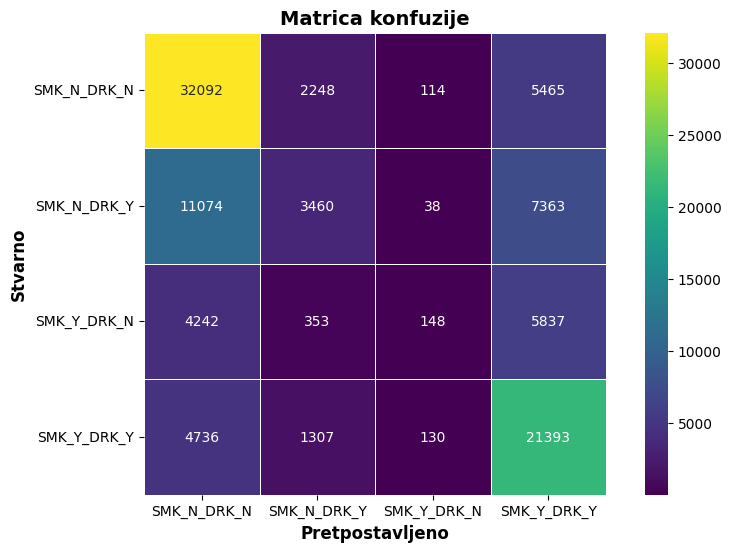

***** Model: LogisticRegression *****

Test Accuracy: 0.5162
Test F1 score: 0.3788131724780889

[[31804  4488   102  3525]
 [11492  6321    62  4060]
 [ 6100  1335   148  2997]
 [ 9119  4958   142 13347]]


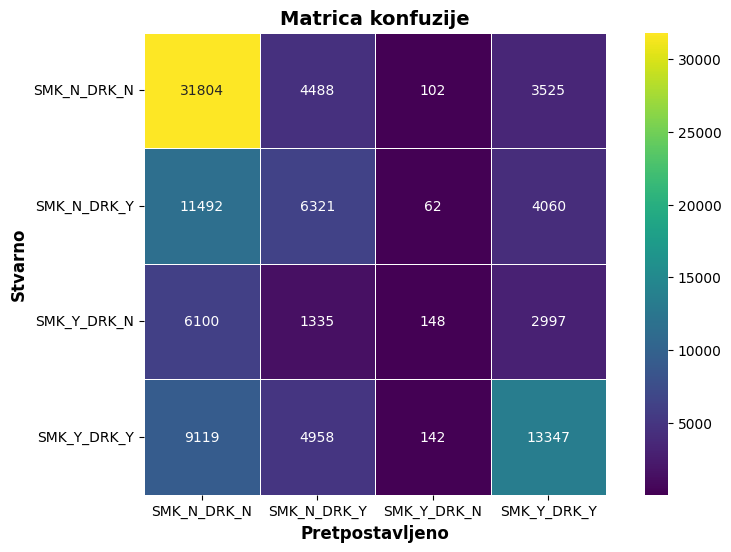

***** Model: RandomForestClassifier *****

Test Accuracy: 0.5873
Test F1 score: 0.3529612518093803

[[32988    77     0  6854]
 [13074   185     0  8676]
 [ 1721     5     0  8854]
 [ 1972    37     0 25557]]


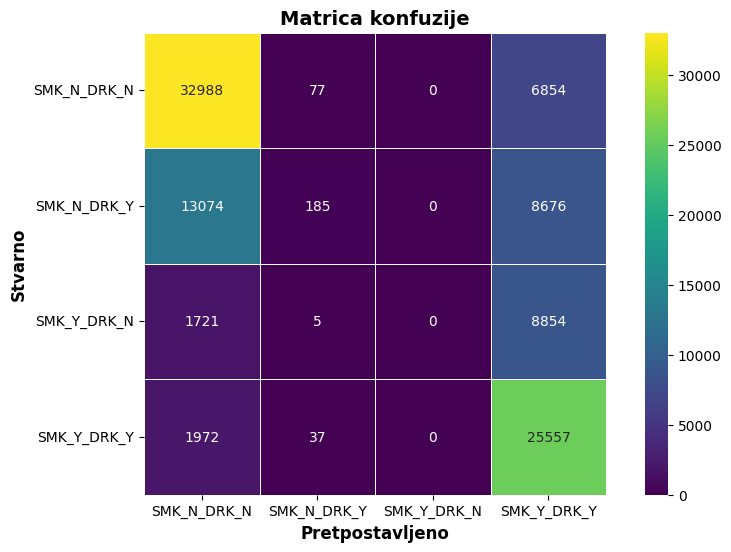

In [80]:
for model_name, results in best_models_test_results.items():
    print(f"***** Model: {model_name} *****\n")
    print(f"Test Accuracy: {results['accuracy']}\nTest F1 score: {results['f1_score']}\n")
    plot_conf_matrix(results['y_test'], results['y_pred'])